In [123]:
import torch 
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [125]:
x = data.data
y = data.target
scaler = StandardScaler()
x  = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)




In [126]:
model = nn.Sequential(
    nn.Linear(x_train.shape[1],1),
    nn.Sigmoid()
)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [127]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

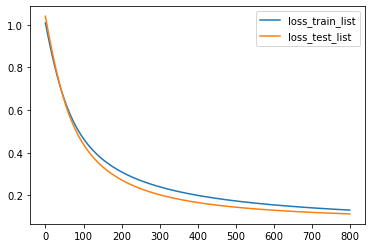

In [128]:
num_epochs = 800
loss_train_list = np.zeros(num_epochs)
loss_test_list = np.zeros(num_epochs)
acc_train_list = np.zeros(num_epochs)
acc_test_list = np.zeros(num_epochs)
for i in range(num_epochs):
    optimizer.zero_grad()
    y_result = model(x_train)
    loss_train = criterion(y_result,y_train)
    loss_train_list[i] = loss_train.item()

    train_acc = np.mean(np.round(y_result.detach().numpy()) == np.round(y_train.detach().numpy()))
    acc_train_list[i] = train_acc
    
    y_result = model(x_test)
    loss_test = criterion(y_result,y_test)
    loss_test_list[i] = loss_test.item()
    
    test_acc = np.mean(np.round(y_result.detach().numpy()) == np.round(y_test.detach().numpy()))
    acc_test_list[i] = test_acc

    loss_train.backward()
    optimizer.step()

plt.plot(loss_train_list, label = "loss_train_list")
plt.plot(loss_test_list, label = "loss_test_list")
plt.legend()
plt.show()

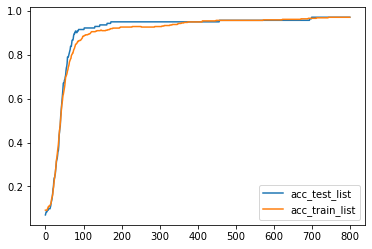

In [129]:
plt.plot(acc_test_list, label = "acc_test_list")
plt.plot(acc_train_list, label = "acc_train_list")
plt.legend()
plt.show()